# Classificando digítos com MLPs

Vamos utilizar um modelo MLP para realizar a classificação de imagens que possuem digítos (0-9).

Para o teste utilizaremos o dataset digits do sklearn (https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html)

O dataset é composto por imagens 8x8 em tons de cinza, cada uma com sua label correspondente (0-9).


```OBS: Quando pedido, realize a operação na célula correspondente atribuindo o resultado na variável indicada. Não altere os nomes das variáveis utilizadas. Você pode utilizar celular adicionais para realizar testes, utilizando variaveis auxiliares para visualizar resultados intermediários.```

## 01 - Importando as bibliotecas e carregando o dataset

Utilizamos o módulo datasets do sklearn para carregar os dados a partir da função load_digits(return_X_y=True).

Passamos o parâmetro return_X_y com True para que a função retorne os exemplos e as anotações em variaveis separadas, atribuimos o resultado na variavel images e target, respectivamente. As variáveis serão retornadas como numpy.*ndarray*

In [22]:
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

import numpy as np
import cv2

images, target = datasets.load_digits(return_X_y=True)

In [23]:
## 1.1 - Verifique as dimensões das variáveis images e target
## Substitua as linhas abaixo para retornar o resultado

shape_images =images.shape
shape_target = target.shape

print(shape_images)
print(shape_target)

(1797, 64)
(1797,)


In [24]:
## 1.2 - Quantos exemplos possui o dataset digits?
dataset_size = images.shape[0] # or int(images.size/(8*8))

print(dataset_size)

1797


## 02 - Visualizando os exemplos

Utilizando a biblioteca matplotlib, vamos tentar visualizar alguns dos dados disponíveis no dataset.

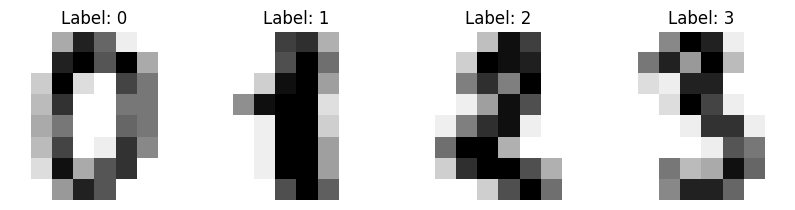

In [30]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, images, target):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {prediction}")

## 03 - Separando as partições

Utilize a função train_test_split do sklearn para separar as partições em dois conjuntos (treino e teste). Utilizaremos o conjunto de treino para ajustar o modelo e o conjunto de teste para avaliar o desempenho do nosso modelo.

Utilize a função de forma que o conjunto de treino possua 70% dos dados e o conjunto de teste possua 30%.

Referência train_test_split: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split

In [39]:
import time

# 3.1 Utilize a função train_test_split para obter as partições
# Atribua o resultado nas variaveis acima
# INSIRA O CÓDIGO AQUI
X_train, X_test, y_train, y_test = train_test_split(images, target,test_size=.3,random_state=int(time.time()))

# 3.2 Compute o tamanho de cada partição, atribuindo o valor nas variaveis abaixo
train_size = y_train.size # or X_train.shape[0]
test_size  = y_test.size # or X_test.shape[0]

print(train_size, test_size)

1257 540


## 04 - Inicializando e treinando o modelo

Agora vamos carregar e treinar o modelo utilizando os dados da partição de treino.

Vamos utilizar a classe MLPClassifier do sklearn para instanciar a nossa rede (https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

Crie um modelo que contenha 3 camadas escondidas de dimensão (50,20,10) utilizando a função de ativação relu, otimizador adam, e learning rate 0.001. (Utilize max_iter=300)

In [40]:
# 4.1 - Inicialize o modelo instanciando o classificador com o sklearn e atribua a variavel network

# INSIRA O CÓDIGO AQUI
network = MLPClassifier(hidden_layer_sizes=(50,20,10), activation='relu', solver='adam',learning_rate_init=0.001, max_iter=300)

print(network.activation, network.solver,
      network.learning_rate_init, network.hidden_layer_sizes)

relu adam 0.001 (50, 20, 10)


In [41]:
# 4.2 - Utilize a função fit para realizar o treinamento com as partições X_train e y_train

# INSIRA O CÓDIGO AQUI
network.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 20, 10), max_iter=300)

## 05 - Avaliando o resultado

Utilize a função predict, para realizar as predições com o conjunto X_test

In [42]:
# 5.1 - Utilize a função predict a partir do modelo treinado

# INSIRA O CÓDIGO AQUI
predictions = network.predict(X_test)

print(
    f"Classification report for classifier {network}:\n"
    f"{metrics.classification_report(y_test, predictions)}\n"
)


Classification report for classifier MLPClassifier(hidden_layer_sizes=(50, 20, 10), max_iter=300):
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        59
           1       0.95      0.95      0.95        55
           2       0.98      0.94      0.96        47
           3       0.97      0.99      0.98        67
           4       0.98      0.98      0.98        55
           5       0.94      0.96      0.95        50
           6       0.96      0.98      0.97        51
           7       0.98      0.96      0.97        52
           8       0.92      0.91      0.91        53
           9       0.94      1.00      0.97        51

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540




Podemos verificar os parâmetros da rede a partir do atributo coefs_.
Da mesma forma, podemos acessar o valor de bias de cada neurônio acessando o atributo intercepts_.

Acesse os atributos coefs_ e intercepts_ da rede para verificar a dimensão dos conjuntos de pesos da rede criada. Utilize esses valores para calcular o numero de parâmetros treinaivéis que a nossa rede possui.


In [43]:
weights = network.coefs_
bias    = network.intercepts_

# 5.2 - Compute o numero de parametros e substitua o valor da variável abaixo com o numero de parametros do modelo

parameters_number = sum(weights[index].size + bias[index].size for index in range(len(weights)))

print(parameters_number)

4590


## 06 - Testando em um dataset externo

Treinamos e testamos nosso modelo em um unico dataset. Na prática, vamos querer aplicar o nosso modelo em diferentes conjuntos e dados.

Para simular este caso, vamos carregar alguns imagens do dataset MNIST. Podemos acessar o MNIST pelo PyTorch, utlizando o módulo datasets.MNIST.

O MNIST também é um dataset para classificação de digitos, porém, o dataset é composto por imagens em tons de cinza de dimensão 28x28 com anotações entre 0-9.

As células seguintes são utilizadas para baixar a partição de teste do dataset localmente, carregar os exemplos utilizando a classe dataloader do PyTorch.

Podemos manipular o dataloader como um objeto do tipo iterator, desta forma, podemos obter os exemplos utilizando a função next() do python; ou qualquer outra função compativel com iterators.

Utilizamos o batch_size igual a 10, que significa que para cada iteração do dataloader obtemos 10 imagens do conjunto de teste.

As imagens e labels são retornadas ao final do processo utilizando as variaveis mnist_images e mnist_label.

In [44]:
import torch
from torch.utils import data
from torchvision import transforms, datasets

transform = transforms.ToTensor()

test_ds = datasets.MNIST(root = ".", train = False,
                         download = True, transform = transform)

test_dl = data.DataLoader(
    test_ds, batch_size=50, shuffle=True,
    num_workers=2, pin_memory=True
)

mnist_test_images, mnist_test_labels = next(iter(test_dl))

mnist_test_images  = mnist_test_images.numpy()
mnist_test_labels  = mnist_test_labels.numpy()

Imprimindo a dimensão da imagem, podemos perceber que a representação utilizada pelo PyTorch não corresponde a utilizada pelo nosso modelo.

O PyTorch representa os exemplos do mnist como (B, C, H, W), onde B é o tamanho do batch (numero de imagens), C o número de canais, H a altura da imagem e W a largura da imagem.

In [45]:
print(mnist_test_images.shape)

(50, 1, 28, 28)


Para utilizar essa imagem no nosso modelo, precisamos redimensionar os dados para 8x8 (mesmo tamanho utilizado pela nossa rede). Em seguida, devemos converter essa entrada para um vetor de dimensão (B, 64), transformando nossa imagem 8x8 é um vetor unidimensional.

-> Utilize a função resize do opencv (https://learnopencv.com/image-resizing-with-opencv/) para redimensionar nossos exemplos e em seguida aplique as funções da biblioteca numpy para obter o vetor nas dimensões esperada pelo modelo.

Dica 01: Temos um conjunto de B imagens na variavel mnist_images, itere sobre a variavel e realize as operações para cada imagem individualmente.

Dica 02: Remova a dimensão 1 que representa C antes do resize. O opencv utiliza a representação (H,W,C) - altura, largura, canais. Podendo omitir o valor dos canais quando C=1 (i.e., (H,W)). Utilize o numpy.squeeze (https://numpy.org/doc/stable/reference/generated/numpy.squeeze.html)

Dica 03: Para transformar a imagem em um vetor unidimensional utilize as funções flatten ou reshape do numpy

In [46]:
#images = np.array([cv2.resize(image[0],(8,8)).flatten() for image in mnist_test_images]) how I would do

# 6.1 - remova a dimensão extra que representa os canais

# INSIRA O CÓDIGO AQUI
squeezed_images = mnist_test_images.squeeze(axis=1)

print(squeezed_images.shape)

(50, 28, 28)


In [47]:
# 6.2 - redimensione as imagens para o tamanho 8x8

# INSIRA O CÓDIGO AQUI
resized_images = np.array([cv2.resize(image,(8,8)) for image in squeezed_images])

print(resized_images.shape)

(50, 8, 8)


In [48]:
#6.3 - transforme as imagens 8x8 em vetores de tamanho 64

# INSIRA O CÓDIGO AQUI
mnist_transformed = np.array([image.flatten() for image in resized_images])

print(mnist_transformed.shape)

(50, 64)


-> Execute as próximas células para visualizar as imagens antes e depois das transformações

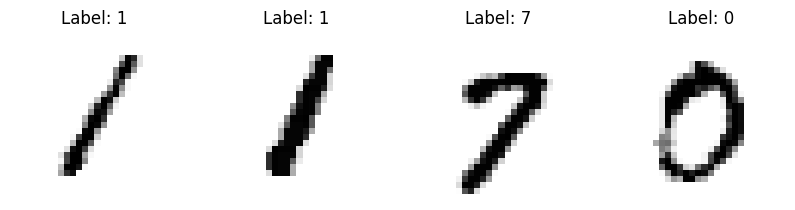

In [49]:
# Visualizando as imagens 28x28 antes da transformação

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, squeezed_images, mnist_test_labels):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {label}")

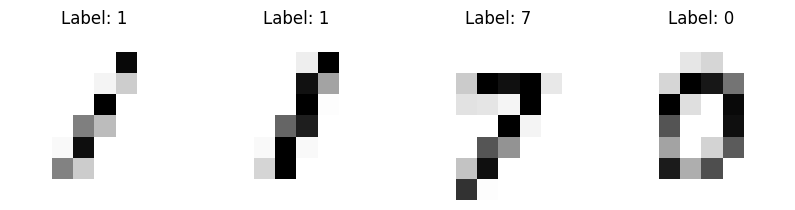

In [50]:
# Visualizando as imagens 8x8

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, mnist_transformed, mnist_test_labels):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {label}")

Vamos passar agora nossas imagens transformadas para que o modelo realize as predições

-> Utilize a função predict para obter os resultados a partir da variavel network, utilizando como parametro nossa variavel mnist_transformed

In [57]:
# 6.5 - Utilize a função predict a partir do modelo treinado

# INSIRA O CÓDIGO AQUI
predictions_mnist = network.predict(mnist_transformed)

print(
    f"Classification report for classifier {network}:\n"
    f"{metrics.classification_report(mnist_test_labels, predictions_mnist, zero_division='warn')}\n"
)

Classification report for classifier MLPClassifier(hidden_layer_sizes=(50, 20, 10), max_iter=300):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         6
           2       0.19      0.86      0.31         7
           3       0.00      0.00      0.00         6
           4       0.10      0.17      0.12         6
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         4
           9       0.50      0.12      0.20         8

    accuracy                           0.16        50
   macro avg       0.08      0.11      0.06        50
weighted avg       0.12      0.16      0.09        50




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-> Avalie o resultado anterior. O modelo manteve a acurácia?

A acurácia diminuiu consideralvemente (i.e., cerca de 1/6 do valor inicial), deslocando-se de um valor consideralvemente bom (i.e., superior a 0.5 e se aproximando de 1.0) para um valor péssimo (i.e., inferior a 0.5 e se aproximando de 0.0).

### Extra (Opcional)

Na célula abaixo carregamos um conjunto adicional de treino do mnist.
Tente treinar o mesmo modelo anterior utilizando esse novo conjunto e avalie o resultado final.

Teste o treinamento com imagens 8x8 e também com 28x28. O resultado é alterado utilizando o mesmo modelo?

Teste diferentes tamanhos de imagens, diferentes arquiteturas e diferentes métodos de resize para avaliar as mudanças dos resultados.


In [58]:
train_ds = datasets.MNIST(root = ".", train = False,
                         download = True, transform = transform)

train_dl = data.DataLoader(train_ds, batch_size=1000,
          shuffle=True, num_workers=2, pin_memory=True)

mnist_train_images, mnist_train_labels = next(iter(train_dl))

mnist_train_images = mnist_train_images.numpy()
mnist_train_labels  = mnist_train_labels.numpy()

In [64]:
#(28x28)
# E.1 - Transforme os dados

mnist_train_transformed_non_resized = np.array([image[0].flatten() for image in mnist_train_images])
mnis_test_images = np.array([image.flatten() for image in squeezed_images])

# E.2 - Crie e treine o modelo com o conjunto de treino

network.fit(mnist_train_transformed_non_resized, mnist_train_labels)

# E.3 - Avalie o resultado utilizando o conjunto de teste

predictions_mnist_with_new_train_non_resized = network.predict(mnis_test_images)
print(
    f"Classification report for classifier {network}:\n"
    f"{metrics.classification_report(mnist_test_labels, predictions_mnist_with_new_train_non_resized, zero_division='warn')}\n"
)

Classification report for classifier MLPClassifier(hidden_layer_sizes=(50, 20, 10), max_iter=300):
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         7
           3       1.00      0.67      0.80         6
           4       1.00      0.67      0.80         6
           5       1.00      1.00      1.00         1
           6       0.75      1.00      0.86         3
           7       0.83      1.00      0.91         5
           8       1.00      1.00      1.00         4
           9       0.89      1.00      0.94         8

    accuracy                           0.92        50
   macro avg       0.93      0.93      0.92        50
weighted avg       0.93      0.92      0.92        50




In [67]:
#(8x8)
# E.1 - Transforme os dados

mnist_train_transformed_resized = np.array([cv2.resize(image[0],(8,8)).flatten() for image in mnist_train_images])

# E.2 - Crie e treine o modelo com o conjunto de treino

network.fit(mnist_train_transformed_resized, mnist_train_labels)

# E.3 - Avalie o resultado utilizando o conjunto de teste

predictions_mnist_with_new_train_resized = network.predict(mnist_transformed)
print(
    f"Classification report for classifier {network}:\n"
    f"{metrics.classification_report(mnist_test_labels, predictions_mnist_with_new_train_resized, zero_division='warn')}\n"
)

Classification report for classifier MLPClassifier(hidden_layer_sizes=(50, 20, 10), max_iter=300):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.75      1.00      0.86         6
           2       0.88      1.00      0.93         7
           3       1.00      0.67      0.80         6
           4       0.50      0.33      0.40         6
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         3
           7       0.71      1.00      0.83         5
           8       1.00      1.00      1.00         4
           9       0.83      0.62      0.71         8

    accuracy                           0.82        50
   macro avg       0.82      0.86      0.82        50
weighted avg       0.83      0.82      0.81        50




/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


O resultado foi alterado, com efeito, as acuráncias aumentaram significamente em ambos os casos (i.e., com imagens (28x28) e (8x8)). Notams que, em ambos os casos, a acuráncia é superior a 0.5, contudo com images non resized, a acurácia é melhor (i.e., cerca de 12.19% superior).